In [ ]:
import math

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot

In [3]:
from PIL import Image

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


画像ファイルを自分のドライブにコピーします。

In [ ]:
!wget -O drive/MyDrive/number.jpg https://github.com/toho-cmt/brain/raw/main/number.jpg
!ls -l drive/MyDrive/number.jpg

画像ファイルを読み込みます。

In [9]:
file_orig = 'drive/MyDrive/number.jpg'

In [10]:
image = Image.open(file_orig) #ドライブから画像を読み込む

読み込んだファイルを表示してみます。

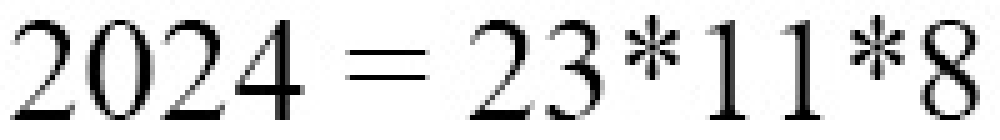

In [11]:
image_large = image.resize((image.width*5, image.height*5),resample=0)
image_large

In [ ]:
A = np.array(image,dtype=float) #画像を行列に変換

In [ ]:
from PIL import ImageOps

In [ ]:
image_gray = ImageOps.grayscale(image)

In [ ]:
A = np.array(image_gray, dtype=float)

In [ ]:
print('size of A:', A.shape)

size of A: (28, 200)


In [ ]:
A = np.uint8(A)

In [ ]:
A = (A//128)*255 #白（255）か黒(0)の2値に変換。

In [ ]:
image_binary = Image.fromarray(A)

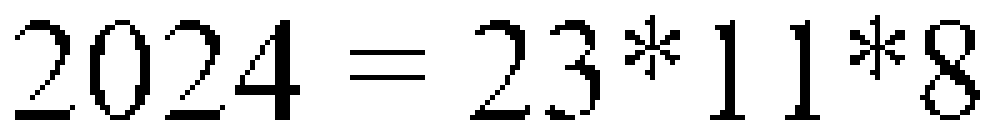

In [ ]:
image_binary_large = image_binary.resize((image_binary.width*5, image_binary.height*5),resample=0)
image_binary_large

In [ ]:
Ainit = np.random.randint(255, size=(28,200),dtype=np.uint8)

In [ ]:
Ainit = (Ainit//128)*255

In [ ]:
imageinit = Image.fromarray(Ainit)

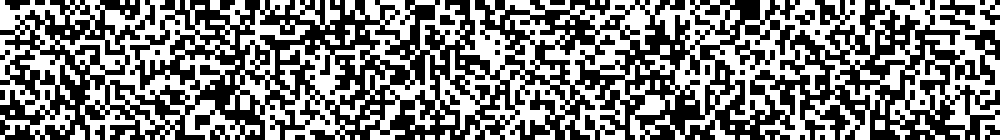

In [ ]:
imageinit_large = imageinit.resize((imageinit.width*5, imageinit.height*5),resample=0)
imageinit_large

In [ ]:
Ainit = (Ainit//255 -0.5)*2 #255と0を1と-1に変換。

In [ ]:
A = (A//255 -0.5)*2

In [ ]:
A_rev = np.zeros((28,200)) #更新する画像の初期化

In [ ]:
for i in range(28):
 for j in range(200):
  for k in range (28):
   for l in range (200):
    A_rev[i,j] += A[i,j]*A[k,l]*Ainit[k,l] #更新開始、まず、Jijをかけて和をとる

In [ ]:
for i in range(28):
 for j in range (200):
  A_rev[i,j] -= A[i,j]*A[i,j]*Ainit[i,j] #Jiiの対角成分を引く

In [ ]:
A_rev = np.sign(A_rev) #和をとったものの符号を求める。更新終了。

In [ ]:
A_rev = (A_rev+1.1)//2*255 #1(-1)を255白(0黒)に変換。

In [ ]:
image_rev = Image.fromarray(np.uint8(A_rev))

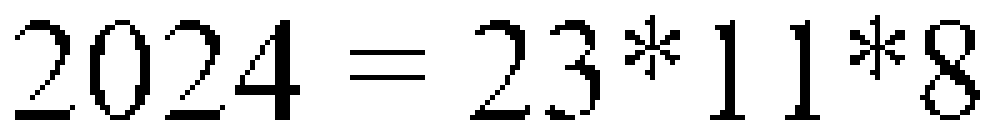

In [ ]:
image_rev_large = image_rev.resize((image_rev.width*5, image_rev.height*5),resample=0)
image_rev_large

In [ ]:
file_out = 'drive/MyDrive/image_out.jpg'

In [ ]:
imageinit_large.save(file_out)